# 1 -  Import Libraries

In [72]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Data Exploratory, Visualisation, Cleaning

## 2.1 - Load the data

In [79]:
train_data = pd.read_csv('../input/airbnb_052020_dataset.csv', dtype={"zipcode": np.string_}).set_index('id')

In [77]:
train_data.head()

,zipcode,latitude,longitude,neighbourhood_cleansed,is_location_exact,bedrooms,room_type,bathrooms,beds,bed_type,...,host_is_superhost,host_total_listings_count,host_identity_verified,minimum_nights,maximum_nights,availability_365,is_instant_bookable,cancellation_policy,is_new_price,price
id,,,,,,,,,,,,,,,,,,,,,
27041946,75013.0,48.82773,2.34844,Gobelins,1,0.0,Entire home/apt,1.0,1.0,Bed,...,0.0,1.0,0,14,15,0,1,flexible,0,36.0
24152849,75020.0,48.85070,2.40250,Ménilmontant,1,1.0,Private room,1.0,1.0,Bed,...,0.0,1.0,1,2,30,89,0,moderate,0,27.0
37074147,75020.0,48.87623,2.38288,Buttes-Chaumont,1,1.0,Entire home/apt,1.5,1.0,Bed,...,0.0,0.0,1,6,19,0,0,flexible,0,40.0
27587792,75018.0,48.89417,2.33727,Buttes-Montmartre,1,1.0,Entire home/apt,1.0,2.0,Bed,...,0.0,0.0,0,2,1125,0,0,strict,0,100.0
29975850,75003.0,48.85980,2.35518,Hôtel-de-Ville,1,1.0,Entire home/apt,1.0,1.0,Bed,...,0.0,193.0,1,91,1125,365,0,strict,0,85.0


In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39811 entries, 14118966 to 41784682
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zipcode                    39447 non-null  object 
 1   latitude                   39811 non-null  float64
 2   longitude                  39811 non-null  float64
 3   neighbourhood_cleansed     39811 non-null  object 
 4   is_location_exact          39811 non-null  int64  
 5   bedrooms                   39729 non-null  float64
 6   room_type                  39811 non-null  object 
 7   bathrooms                  39777 non-null  float64
 8   beds                       39686 non-null  float64
 9   bed_type                   39811 non-null  object 
 10  accommodates               39811 non-null  int64  
 11  essentials                 39811 non-null  int64  
 12  wifi                       39811 non-null  int64  
 13  tv                         39811 non

In [81]:
train_data.isna().sum()

zipcode                      364
latitude                       0
longitude                      0
neighbourhood_cleansed         0
is_location_exact              0
bedrooms                      82
room_type                      0
bathrooms                     34
beds                         125
bed_type                       0
accommodates                   0
essentials                     0
wifi                           0
tv                             0
kitchen                        0
oven                           0
cooking basics                 0
heating                        0
washer                         0
host greets you                0
elevator                       0
family/kid friendly            0
private living room            0
coffee maker                   0
dishwasher                     0
host_is_superhost              7
host_total_listings_count      7
host_identity_verified         0
minimum_nights                 0
maximum_nights                 0
availabili

In [82]:
train_data.host_total_listings_count.value_counts()

1.0      26268
2.0       4039
0.0       3861
3.0       1066
4.0        508
         ...  
304.0        1
272.0        1
280.0        1
28.0         1
313.0        1
Name: host_total_listings_count, Length: 89, dtype: int64

## 2.2 Exploration, Visualisation ... 

### 2.2.1 - Summary statistics

#### Attributs : host_is_superhost, host_identity_verified

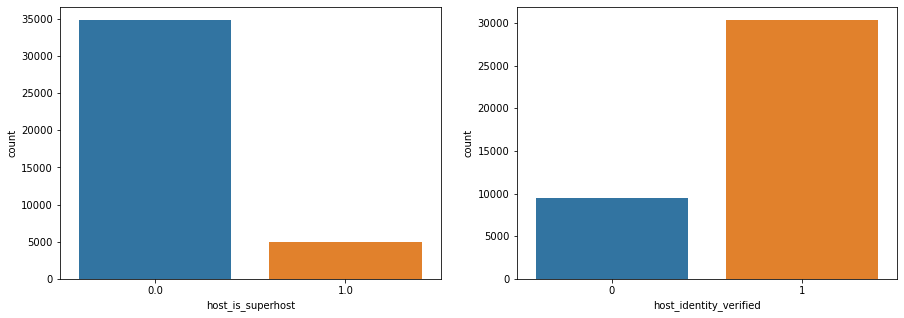

In [83]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='host_is_superhost', data=train_data, ax=axis[0])
sns.countplot(x='host_identity_verified', data=train_data, ax=axis[1])
plt.show()

#### Attribut : price

In [84]:
train_data['price'].describe()

count    39811.000000
mean       103.268644
std         76.314909
min          8.000000
25%         60.000000
50%         80.000000
75%        120.000000
max        600.000000
Name: price, dtype: float64

In [113]:
train_data.shape

(59939, 36)

In [114]:
 80 * 4

320

- Parès vérification sur le site d'airbnb, on se rend compte que les logment qui dépasse les 600 € la nuit sont soit : 
    - Des annances suspectes,
    - Des logements de luxes !! 
    - Des locations pour événements pro
    - etc, 
- On se limite à des logement de prix <= 600 : 99%

In [115]:
train_data = train_data[train_data.price  <= 600 ]

In [116]:
train_data = train_data[train_data.price  > 0 ]

In [117]:
train_data.shape

(59420, 36)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa57be91850>]],
      dtype=object)

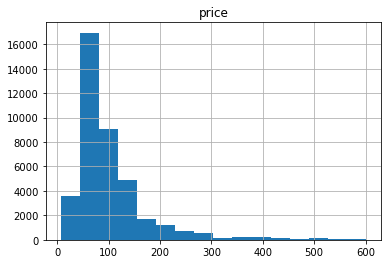

In [85]:
train_data.hist(column='price', bins=16)

--> appliquer une log transformation au prix  

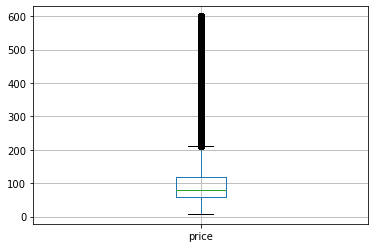

In [119]:
train_data.boxplot(column='price')

#### Attributs : bedrooms, room_type, beds, bed_type, bathrooms, accommodates, neighbourhood_cleansed, zipcode

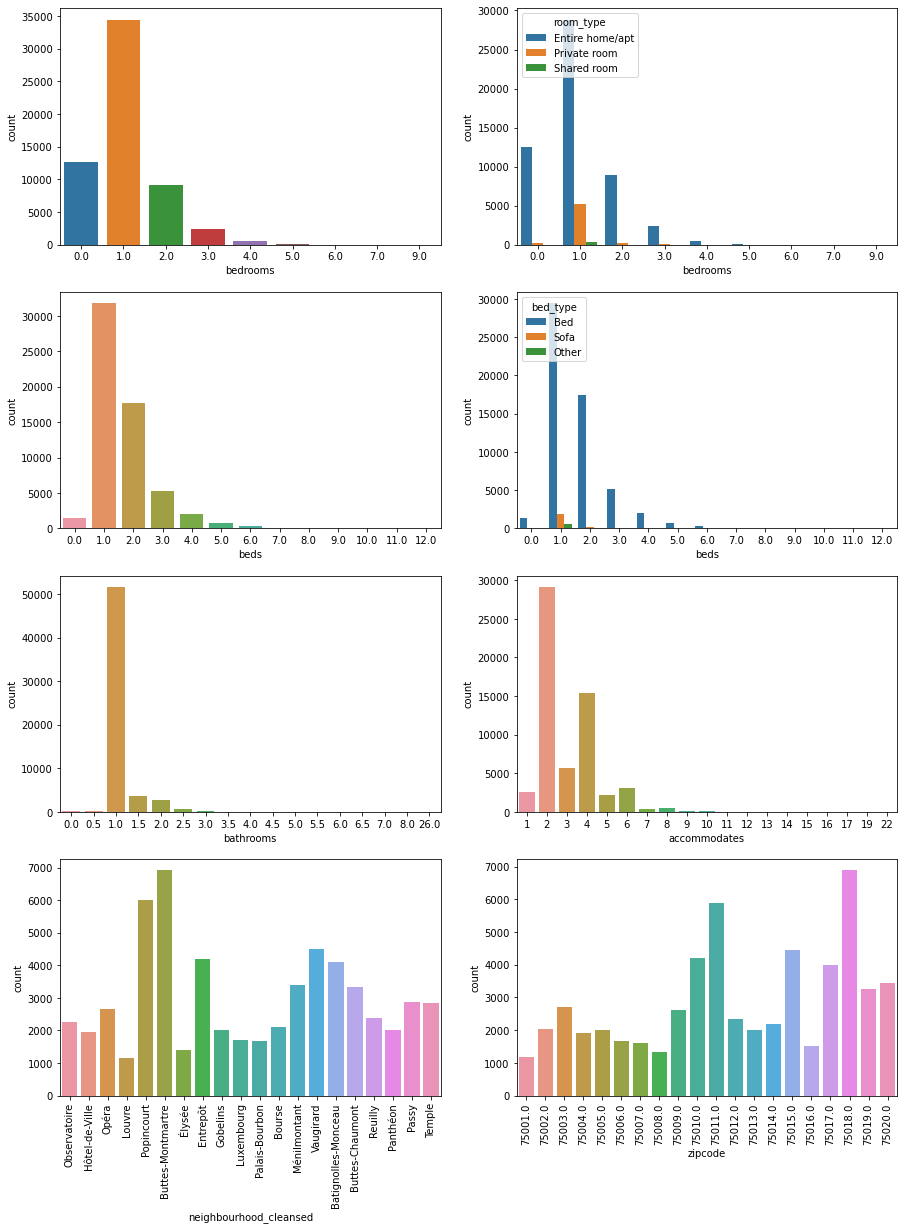

In [120]:
fig, axis = plt.subplots(4, 2, figsize=(15,20))
sns.countplot(x='bedrooms', data=train_data, ax=axis[0,0])
sns.countplot(x='bedrooms', hue='room_type', data=train_data, ax=axis[0,1])
sns.countplot(x='beds', data=train_data, ax=axis[1,0])
sns.countplot(x='beds', hue='bed_type', data=train_data, ax=axis[1,1])
sns.countplot(x='bathrooms', data=train_data, ax=axis[2,0])
sns.countplot(x='accommodates', data=train_data, ax=axis[2,1])
sns.countplot(x='neighbourhood_cleansed', data=train_data, ax=axis[3,0])
axis[3,0].tick_params(axis='x',labelrotation=90)
sns.countplot(x='zipcode', data=train_data, ax=axis[3,1])
axis[3,1].tick_params(axis='x',labelrotation=90)
plt.show()

In [121]:
#beds
train_data[(train_data.bedrooms>5)][['bedrooms',
                                    'room_type',
                                    'beds',
                                    'bathrooms',
                                    'accommodates',
                                    'price']]

,bedrooms,room_type,beds,bathrooms,accommodates,price
id,,,,,,
3992798,6.0,Entire home/apt,8.0,5.5,14,500.0
5108844,9.0,Entire home/apt,4.0,2.0,6,460.0
13243111,6.0,Entire home/apt,12.0,3.0,16,500.0
16905683,6.0,Entire home/apt,9.0,3.0,12,600.0
24236332,6.0,Entire home/apt,1.0,1.0,2,150.0
34265385,7.0,Entire home/apt,1.0,1.0,2,76.0
38398111,6.0,Entire home/apt,1.0,0.5,2,35.0
39286929,6.0,Entire home/apt,10.0,4.0,19,150.0
41757191,6.0,Entire home/apt,10.0,4.0,19,180.0


- Onpeut vérifier sur airbnb que ces données sont incohérentes 

In [122]:
train_data = train_data[(train_data.bedrooms<=5)]

In [21]:
#beds
train_data[(train_data.beds>5)][['bedrooms',
                                    'room_type',
                                    'beds',
                                    'bathrooms',
                                    'accommodates',
                                    'price']]

,bedrooms,room_type,beds,bathrooms,accommodates,price
id,,,,,,
21688585,3.0,Entire home/apt,8.0,2.0,13,120.0
9377861,3.0,Entire home/apt,7.0,2.0,8,280.0
18146763,2.0,Entire home/apt,6.0,1.0,6,250.0
5723521,4.0,Entire home/apt,7.0,2.0,13,425.0
35748629,3.0,Entire home/apt,7.0,2.0,14,132.0
...,...,...,...,...,...,...
31452762,3.0,Entire home/apt,6.0,2.0,11,120.0
19923619,5.0,Entire home/apt,6.0,2.0,8,450.0
3102927,3.0,Entire home/apt,6.0,2.0,6,205.0


- On peut vérifier sur le site de airbnb que ces logments proposes plusieurs lits/canapés

In [123]:
#beds
train_data[(train_data.bathrooms>5)][['bedrooms',
                                    'room_type',
                                    'beds',
                                    'bathrooms',
                                    'accommodates',
                                    'price']]

,bedrooms,room_type,beds,bathrooms,accommodates,price
id,,,,,,
4612894,1.0,Private room,1.0,6.5,2,25.0
4819335,0.0,Entire home/apt,1.0,6.0,2,70.0
6179381,1.0,Private room,1.0,8.0,2,60.0
7705707,0.0,Entire home/apt,1.0,7.0,2,76.0
9017392,1.0,Private room,1.0,8.0,2,32.0
9212197,1.0,Private room,1.0,6.0,2,55.0
16032537,5.0,Entire home/apt,5.0,5.5,10,550.0
33500609,1.0,Shared room,1.0,26.0,1,500.0
41185397,5.0,Entire home/apt,5.0,6.5,10,600.0


- Onpeut vérifier sur airbnb que ces données sont incohérentes 

In [23]:
train_data = train_data[(train_data.bathrooms<=5)]

In [124]:
#accommodates
train_data[(train_data.accommodates>15)][['bedrooms',
                                    'room_type',
                                    'beds',
                                    'bathrooms',
                                    'accommodates',
                                    'price']]

,bedrooms,room_type,beds,bathrooms,accommodates,price
id,,,,,,
11412291,5.0,Entire home/apt,9.0,2.0,16,500.0
13595577,0.0,Entire home/apt,1.0,1.0,16,60.0
17938025,5.0,Entire home/apt,9.0,3.0,16,600.0
25152369,5.0,Entire home/apt,11.0,2.0,17,120.0
42086251,5.0,Entire home/apt,11.0,2.0,17,120.0
43352404,5.0,Entire home/apt,12.0,4.0,22,120.0
43352405,4.0,Entire home/apt,10.0,3.0,16,120.0
43352408,5.0,Entire home/apt,10.0,2.0,17,120.0


- Ces données sembles OK ! 

### 2.2.1 -  Looking for linear Correlations 

In [125]:
train_data = pd.read_csv('../input/dataset/airbnb_052020_train_cleaned.csv').set_index('id')
correlations = train_data.corr()

In [126]:
correlations['price'].sort_values(ascending=False)

price                        1.000000
accommodates                 0.544725
bedrooms                     0.539862
bathrooms                    0.487876
beds                         0.486555
Dishwasher                   0.309946
availability_365             0.305797
host_total_listings_count    0.280675
TV                           0.234385
Coffee maker                 0.197700
Oven                         0.188136
Washer                       0.168224
Cooking basics               0.154443
Family/kid friendly          0.129289
Elevator                     0.117488
price_recently_updated       0.101016
Wifi                         0.093786
instant_bookable             0.091413
host_is_superhost            0.072175
Kitchen                      0.062736
maximum_nights               0.054002
Host greets you              0.051082
Private living room          0.030372
Heating                      0.028018
minimum_nights               0.023768
Essentials                   0.005709
latitude    

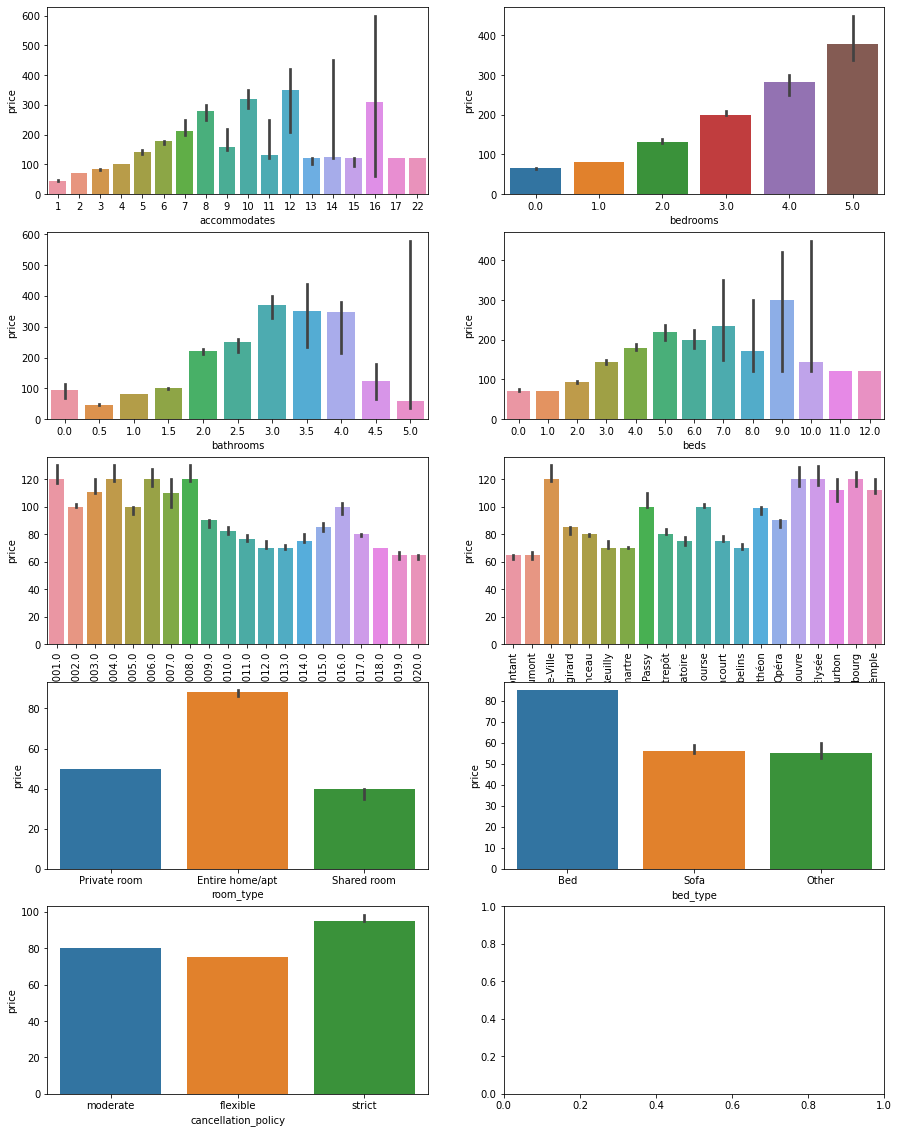

In [127]:
fig, axis = plt.subplots(5, 2, figsize=(15,20))
sns.barplot(x='accommodates', y='price', data= train_data, estimator=np.median,  ax=axis[0,0])
sns.barplot(x='bedrooms', y='price', data= train_data, estimator=np.median,  ax=axis[0,1])
sns.barplot(x='bathrooms', y='price', data= train_data, estimator=np.median,  ax=axis[1,0])
sns.barplot(x='beds', y='price', data= train_data, estimator=np.median, ax=axis[1,1])
sns.barplot(x='zipcode', y='price', data= train_data, estimator=np.median, ax=axis[2,0])
axis[2,0].tick_params(axis='x',labelrotation=90)
sns.barplot(x='neighbourhood_cleansed', y='price', data= train_data, estimator=np.median, ax=axis[2,1])
axis[2,1].tick_params(axis='x',labelrotation=90)
sns.barplot(x='room_type', y='price', data= train_data, estimator=np.median, ax=axis[3,0])
sns.barplot(x='bed_type', y='price', data= train_data, estimator=np.median, ax=axis[3,1])
sns.barplot(x='cancellation_policy', y='price', data= train_data, estimator=np.median, ax=axis[4,0])
plt.show()

# 3 - Feature engineering

- Les compte ayant plus de 5 logements, on les considères commes des agences de location. On peut vérifier sur airbnb que c'est souvent le cas. 

In [128]:
train_data['is_agency'] = train_data['host_total_listings_count'].map(lambda x: 1 if x > 5 else 0)

In [129]:
train_data.corr()['price'].sort_values(ascending=False)

price                        1.000000
accommodates                 0.544725
bedrooms                     0.539862
bathrooms                    0.487876
beds                         0.486555
is_agency                    0.317042
Dishwasher                   0.309946
availability_365             0.305797
host_total_listings_count    0.280675
TV                           0.234385
Coffee maker                 0.197700
Oven                         0.188136
Washer                       0.168224
Cooking basics               0.154443
Family/kid friendly          0.129289
Elevator                     0.117488
price_recently_updated       0.101016
Wifi                         0.093786
instant_bookable             0.091413
host_is_superhost            0.072175
Kitchen                      0.062736
maximum_nights               0.054002
Host greets you              0.051082
Private living room          0.030372
Heating                      0.028018
minimum_nights               0.023768
Essentials  